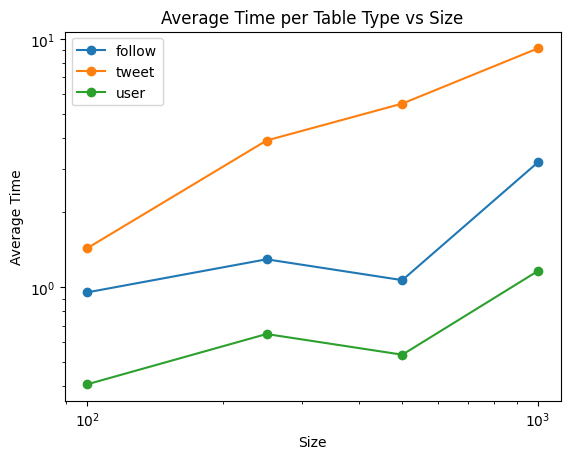

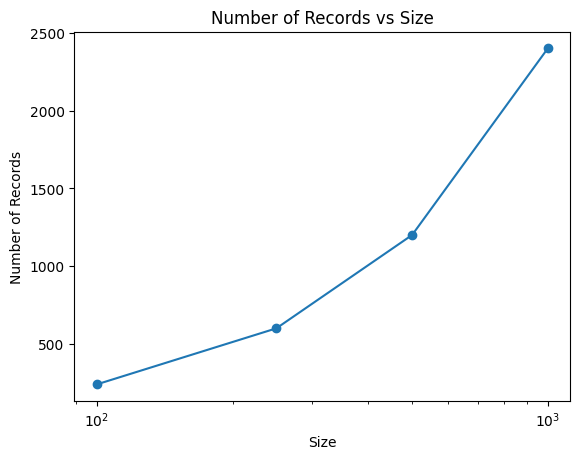

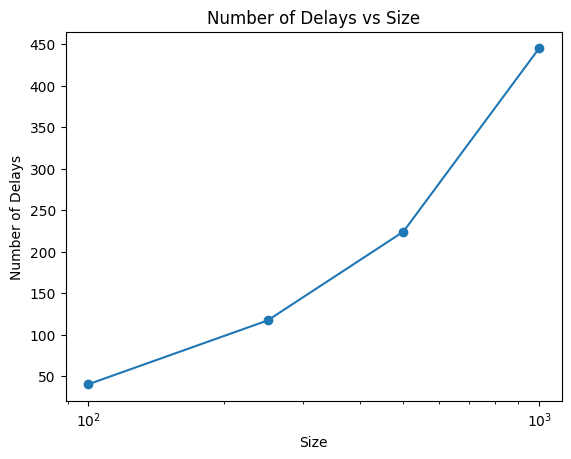

Size: 100
  Average times: {'follow': 0.9531916666666668, 'tweet': 1.4351541666666667, 'user': 0.406375}
  Number of records: 240
  Number of delays: 40

Size: 250
  Average times: {'follow': 1.2955666666666668, 'tweet': 3.898540000000001, 'user': 0.6479149999999999}
  Number of records: 600
  Number of delays: 117

Size: 500
  Average times: {'follow': 1.0678499999999989, 'tweet': 5.490063333333335, 'user': 0.5348516666666666}
  Number of records: 1200
  Number of delays: 224

Size: 1000
  Average times: {'follow': 3.1878995833333326, 'tweet': 9.165589583333336, 'user': 1.1628250000000007}
  Number of records: 2400
  Number of delays: 445



In [5]:
import matplotlib.pyplot as plt

# List of file sizes
sizes = [100, 250, 500, 1000]

# Dictionary to store data for each size
data = {}

for size in sizes:
    filename = f'db_{size}.log'
    with open('../' + filename) as f:
        records = {'follow': 0, 'tweet': 0, 'user': 0}
        num_records = 0
        num_delays = 0

        for l in f:
            if 'RECORD: ' in l and not 'taking longer' in l:
                num_records += 1
                try:
                    key = l.split('table ')[1].split(' comple')[0].replace("'", "")
                    val = float(l.split('completed in ')[1].split(' ')[0])
                except Exception as e:
                    print(l)
                    print(e)
                records[key] += val
            if 'delayed' in l:
                num_delays += 1

    avg = {k: v / num_records for k, v in records.items()}
    data[size] = {'avg': avg, 'num_records': num_records, 'num_delays': num_delays}

# Extract data for plotting
avg_data = {'follow': [], 'tweet': [], 'user': []}
num_records_list = []
num_delays_list = []

for size in sizes:
    avg = data[size]['avg']
    num_records = data[size]['num_records']
    num_delays = data[size]['num_delays']

    for k in ['follow', 'tweet', 'user']:
        avg_data[k].append(avg[k])

    num_records_list.append(num_records)
    num_delays_list.append(num_delays)

# Plot average time per table type vs size
plt.figure()
for table_type in ['follow', 'tweet', 'user']:
    plt.plot(sizes, avg_data[table_type], label=table_type, marker='o')
plt.xlabel('Size')
plt.ylabel('Average Time')
plt.title('Average Time per Table Type vs Size')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

# Plot number of records vs size
plt.figure()
plt.plot(sizes, num_records_list, marker='o')
plt.xlabel('Size')
plt.ylabel('Number of Records')
plt.title('Number of Records vs Size')
plt.xscale('log')
plt.show()

# Plot number of delays vs size
plt.figure()
plt.plot(sizes, num_delays_list, marker='o')
plt.xlabel('Size')
plt.ylabel('Number of Delays')
plt.title('Number of Delays vs Size')
plt.xscale('log')
plt.show()

# Print the data
for size in sizes:
    print(f"Size: {size}")
    print(f"  Average times: {data[size]['avg']}")
    print(f"  Number of records: {data[size]['num_records']}")
    print(f"  Number of delays: {data[size]['num_delays']}\n")


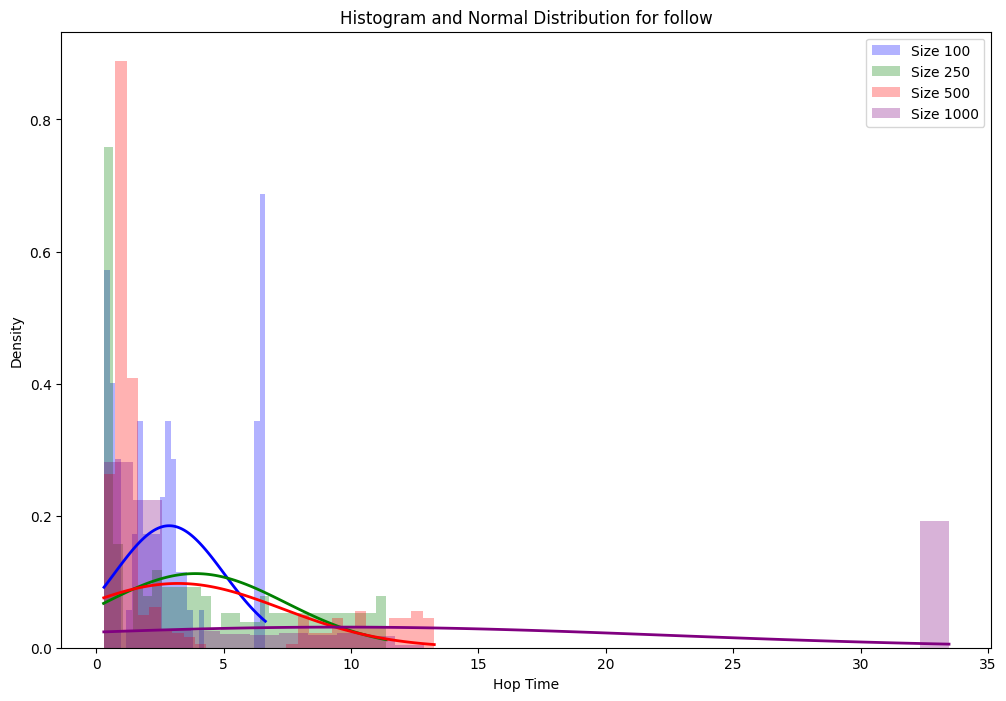

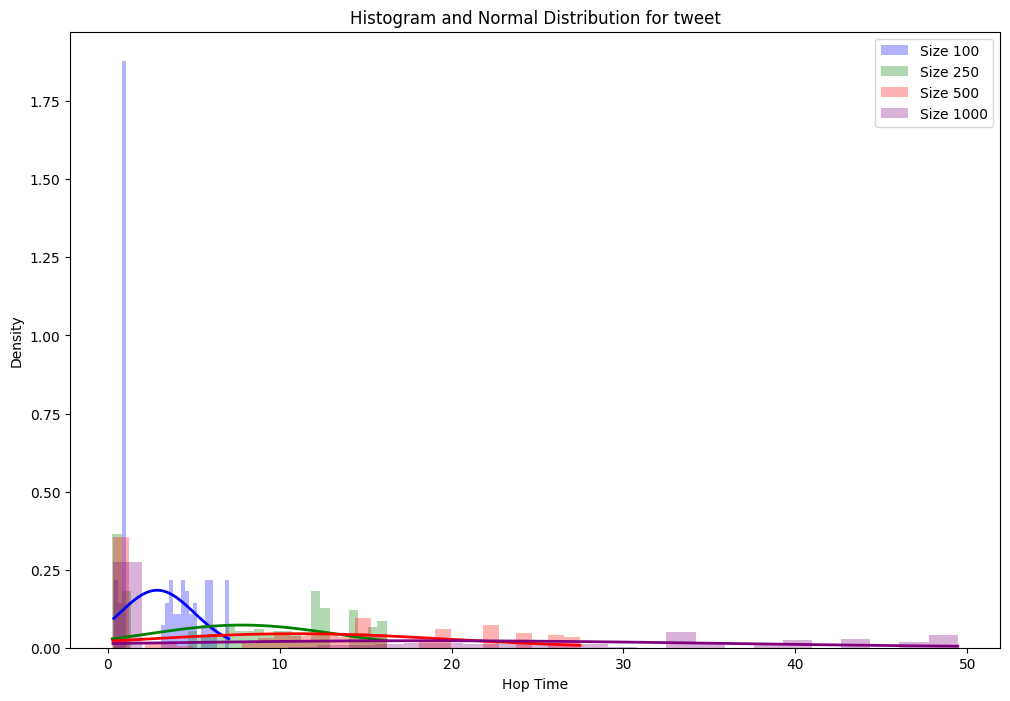

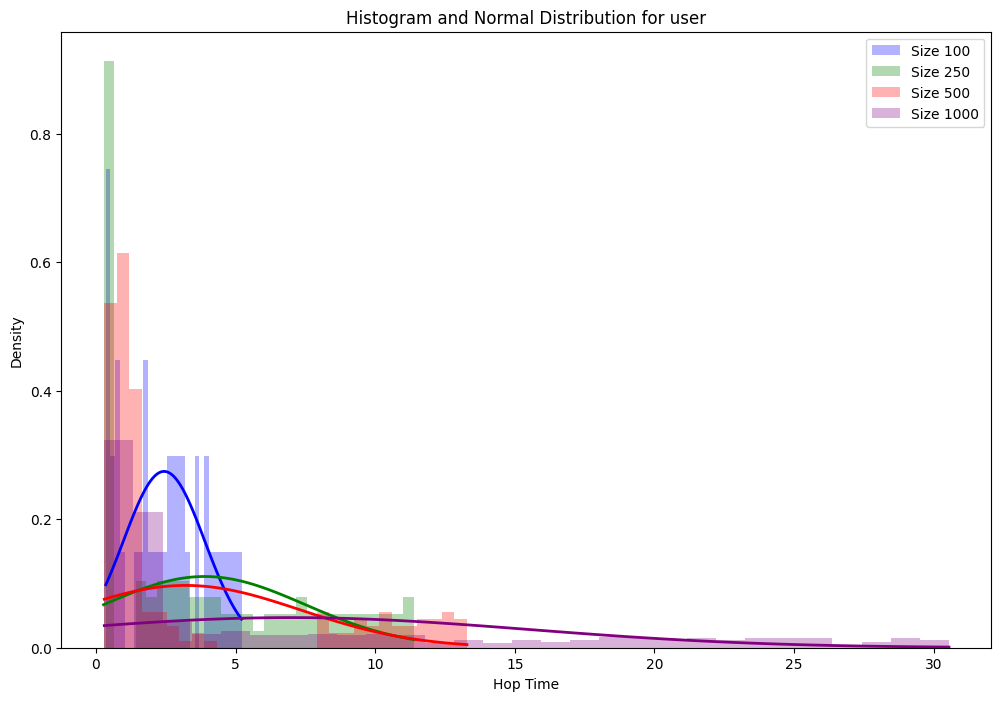

Size: 100
  Average time for follow: 2.8596
  Average time for tweet: 2.8703
  Average time for user: 2.4383
  Number of records: 240
  Number of delays: 40

Size: 250
  Average time for follow: 3.8867
  Average time for tweet: 7.7971
  Average time for user: 3.8875
  Number of records: 600
  Number of delays: 117

Size: 500
  Average time for follow: 3.2035
  Average time for tweet: 10.9801
  Average time for user: 3.2091
  Number of records: 1200
  Number of delays: 224

Size: 1000
  Average time for follow: 9.5637
  Average time for tweet: 18.3312
  Average time for user: 6.9769
  Number of records: 2400
  Number of delays: 445



In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# List of file sizes
sizes = [100, 250, 500, 1000]

# Dictionary to store data for each size
data = {}

for size in sizes:
    filename = f'db_{size}.log'
    with open('../' + filename) as f:
        records = {'follow': [], 'tweet': [], 'user': []}
        num_records = 0
        num_delays = 0

        for l in f:
            if 'RECORD: ' in l and not 'taking longer' in l:
                num_records += 1
                try:
                    key = l.split('table ')[1].split(' comple')[0].replace("'", "")
                    val = float(l.split('completed in ')[1].split(' ')[0])
                except Exception as e:
                    print(l)
                    print(e)
                records[key].append(val)
            if 'delayed' in l:
                num_delays += 1

    data[size] = {'records': records, 'num_records': num_records, 'num_delays': num_delays}

# Plot histograms and fit normal distributions
for table_type in ['follow', 'tweet', 'user']:
    plt.figure(figsize=(12, 8))
    colors = ['blue', 'green', 'red', 'purple']
    for i, size in enumerate(sizes):
        hop_times = data[size]['records'][table_type]
        # Plot histogram
        bins = np.linspace(min(hop_times), max(hop_times), 30)
        plt.hist(hop_times, bins=bins, density=True, alpha=0.3, color=colors[i], label=f'Size {size}')
        # Fit normal distribution
        mu, std = norm.fit(hop_times)
        # Plot the PDF
        x = np.linspace(min(hop_times), max(hop_times), 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, color=colors[i], linewidth=2)
    plt.title(f'Histogram and Normal Distribution for {table_type}')
    plt.xlabel('Hop Time')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Print the data
for size in sizes:
    print(f"Size: {size}")
    for table_type in ['follow', 'tweet', 'user']:
        avg_time = np.mean(data[size]['records'][table_type]) if data[size]['records'][table_type] else 0
        print(f"  Average time for {table_type}: {avg_time:.4f}")
    print(f"  Number of records: {data[size]['num_records']}")
    print(f"  Number of delays: {data[size]['num_delays']}\n")


In [20]:
avg

{'follow': 0.05295416666666669,
 'tweet': 0.1307162499999998,
 'user': 0.02868083333333334}